# 1. Data Collection
### For this notebook we:
#### A. Compute all the multiples and average values
     - cf_to_total_compensation_to_executives
     - cf_to_total_compensation_to_board_members
     - cf_to_capex
     - current_ratio
     - rsi_14_30_average
     - volatility_30_90_180_average
     - net_debt_to_ebitda
     - ev_ebitda
     - ev_to_asset
     - volume_30d_average_to_outstanding
     - dividend_payout_ratio
     - buyback_yield
     - interest_coverage_ratio
     - total_return_5y_4y_3y_2y_average
     - total_return_1y_6m_3m_average
     - eps
#### B. Compute percentile by industry sectors for operations and valuation figures
#### C. Complete one-hot encoding for the "year" column
#### D. Remove duplicates from the same company at the same year
#### E. Drop already targeted companies + target labelling
#### F. Create the a binary column "training_data" 
#### G. Plot counts of missing values for rows & columns
#### H. Plot correlation matrix

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df16 = pd.read_csv('../database/companies/original/2016.csv')
df17 = pd.read_csv('../database/companies/original/2017.csv')
df18 = pd.read_csv('../database/companies/original/2018.csv')
df19 = pd.read_csv('../database/companies/original/2019.csv')
df20 = pd.read_csv('../database/companies/original/2020.csv')
df21 = pd.read_csv('../database/companies/original/2021.csv')
df22 = pd.read_csv('../database/companies/original/2022.csv')
df23 = pd.read_csv('../database/companies/original/2023.csv')

df_campaigns = pd.read_csv('../database/campaigns.csv')

df = pd.concat([df16, df17, df18, df19, df20, df21, df22, df23], ignore_index=True)
df = df[df['ticker'] != 'VR']
df = df[df['ID'] != 'VR']

df.head(3)

,year,ID,ticker,company_name,market_cap,bic_level_2,bic_level_3,unequal_voting,ceo_tenure,ipo_date,...,total_compensation_to_board_members,institution_ownership_percentage,asset_to_equity,current_asset,current_liability,non_current_asset,non_current_liability,cash_conversion_cycle,interest_expense,ceo_is_female
0,2016,1518855D US Equity,1518855D,Yahoo! Inc - Set up for Fundam,3.690000e+10,Media,Internet Media & Services,0.0,9.00000,NaN,...,1150000.000,NaN,1.57,1.270000e+09,7.790956e+09,4.690000e+10,1.850000e+10,NaN,73600000.0,NaN
1,2016,1539941D UN Equity,1539941D,Spectra Energy LLC,2.880000e+10,Oil & Gas,Oil & Gas Producers,0.0,4.25000,NaN,...,3602528.659,41.5,3.00,3.690000e+09,1.750000e+09,3.420000e+10,2.030000e+10,14.6,593000000.0,NaN
2,2016,1556442D UA Equity,1556442D,GigPeak Inc,1.710000e+08,Tech Hardware & Semiconductors,Semiconductors,0.0,9.66667,NaN,...,NaN,NaN,1.30,1.810000e+07,6.477000e+07,7.890000e+07,1.490000e+07,173.0,NaN,NaN


## A. Compute all the multiples and average values

#### A1. cf_to_total_compensation_to_executives

In [3]:
mask = df['total_compensation_to_executives'] != 0
df.loc[mask, 'cf_to_total_compensation_to_executives'] = df.loc[mask, 'headline_fcf'] / df.loc[mask, 'total_compensation_to_executives']
max_values_by_year = df[mask].groupby('year')['cf_to_total_compensation_to_executives'].transform('max')
df.loc[~mask, 'cf_to_total_compensation_to_executives'] = df.loc[~mask, 'year'].map(max_values_by_year)

#### A2. cf_to_total_compensation_to_board_members

In [4]:
mask = df['total_compensation_to_board_members'] != 0
df.loc[mask, 'cf_to_total_compensation_to_board_members'] = df.loc[mask, 'headline_fcf'] / df.loc[mask, 'total_compensation_to_board_members']
max_values_by_year = df[mask].groupby('year')['cf_to_total_compensation_to_board_members'].transform('max')
df.loc[~mask, 'cf_to_total_compensation_to_board_members'] = df.loc[~mask, 'year'].map(max_values_by_year)

#### A3. cf_to_capex

In [5]:
mask = df['capex'] != 0
df.loc[mask, 'cf_to_capex'] = (df.loc[mask, 'headline_fcf'] / df.loc[mask, 'capex']) * -1
max_values_by_year = df[mask].groupby('year')['cf_to_capex'].transform('max')
df.loc[~mask, 'cf_to_capex'] = df.loc[~mask, 'year'].map(max_values_by_year)

#### A4. current_ratio

In [6]:
mask = df['current_liability'] != 0
df.loc[mask, 'current_ratio'] = df.loc[mask, 'current_asset'] / df.loc[mask, 'current_liability']
max_values_by_year = df[mask].groupby('year')['current_ratio'].transform('max')
df.loc[~mask, 'current_ratio'] = df.loc[~mask, 'year'].map(max_values_by_year)

#### A5. rsi_14_30_average

In [7]:
df['rsi_14_30_average'] = df[['rsi_14d','rsi_30d']].mean(axis=1, skipna=True)

#### A6. volatility_30_90_180_average

In [8]:
df['volatility_30_90_180_average'] = df[['volatility_30d','volatility_90d','volatility_180d']].mean(axis=1, skipna=True)

#### A7. net_debt_to_ebitda

In [9]:
mask = df['ebitda'] != 0
df.loc[mask, 'net_debt_to_ebitda'] = df.loc[mask, 'net_debt'] / df.loc[mask, 'ebitda']
max_values_by_year = df[mask].groupby('year')['net_debt_to_ebitda'].transform('max')
df.loc[~mask, 'net_debt_to_ebitda'] = df.loc[~mask, 'year'].map(max_values_by_year)

#### A8. net_debt_to_ebitda

In [10]:
mask = df['ebitda'] != 0
df.loc[mask, 'ev_ebitda'] = df.loc[mask, 'ev'] / df.loc[mask, 'ebitda']
max_values_by_year = df[mask].groupby('year')['ev_ebitda'].transform('max')
df.loc[~mask, 'ev_ebitda'] = df.loc[~mask, 'year'].map(max_values_by_year)

#### A9. ev_to_asset

In [11]:
df['total_assets'] = df['current_asset'] + df['non_current_asset']
mask = df['total_assets'] != 0
df.loc[mask, 'ev_to_asset'] = df.loc[mask, 'ev'] / df.loc[mask, 'total_assets']
max_values_by_year = df[mask].groupby('year')['ev_to_asset'].transform('max')
df.loc[~mask, 'ev_to_asset'] = df.loc[~mask, 'year'].map(max_values_by_year)

#### A10.volume_30d_average_to_outstanding

In [12]:
df['final_shares_outstanding'] = df['current_shares_outstanding']
mask = (df['current_shares_outstanding'].isna()) & (df['shares_outstanding'].notna())
df.loc[mask, 'final_shares_outstanding'] = df.loc[mask, 'shares_outstanding']
df['volume_30d_average_to_outstanding']
mask = df['volume_30d_average'].notna() & df['final_shares_outstanding'].notna()
df.loc[mask, 'volume_30d_average_to_outstanding'] = df['volume_30d_average'] / df['final_shares_outstanding']

#### A11. dividend_payout_ratio

In [13]:
df['dividend_amount'] = df['dividend_to_common'].fillna(0) + df['dividend_to_preferred'].fillna(0)

mask = df['dividend_payout_ratio'].isna() & \
       (~df['dividend_to_common'].isna() | ~df['dividend_to_preferred'].isna()) & \
       ~df['net_income'].isna() & \
       df['net_income'] > 0

df.loc[mask, 'dividend_payout_ratio'] = df['dividend_amount'] / df['net_income']

df.drop('dividend_amount', axis=1, inplace=True)
df['dividend_payout_ratio'] = df['dividend_payout_ratio'].clip(lower=-1000, upper=1000)

#### A12. buyback_yield

In [14]:
mask = df['market_cap'] != 0
df.loc[mask, 'buyback_yield'] = df.loc[mask, 'repurchase'] / df.loc[mask, 'market_cap']
max_values_by_year = df[mask].groupby('year')['buyback_yield'].transform('max')
df.loc[~mask, 'buyback_yield'] = df.loc[~mask, 'year'].map(max_values_by_year)

#### A13 interest_coverage_ratio

In [15]:
# Function to calculate interest coverage ratio
def calculate_interest_coverage_ratio(row):
    if pd.notna(row['ebitda']) and pd.notna(row['interest_expense']) and row['interest_expense'] != 0:
        return row['ebitda'] / row['interest_expense']
    else:
        return None

# Calculate interest_coverage_ratio
df['interest_coverage_ratio'] = df.apply(calculate_interest_coverage_ratio, axis=1)

# Calculate maximum interest_coverage_ratio for each year where interest_expense is 0
max_ratios = df[df['interest_expense'] == 0].groupby('year')['interest_coverage_ratio'].max()

# Update interest_coverage_ratio where interest_expense is 0
df.loc[df['interest_expense'] == 0, 'interest_coverage_ratio'] = df[df['interest_expense'] == 0]['year'].map(max_ratios)

#### A14. total_return_5y_4y_3y_2y_average
#### A15. total_return_1y_6m_3m_average

We need to drop some invalid figures before computing the averages. Say a company was initially offered 3 years before. In this original data, 5-year return, 4-year return, and 3-year return will have the same values. Therefore, what we should do is that, if the two neighboring values of returns are equal to each other, we should replace the value as N/A for the return with longer period. 

In [16]:
return_columns = ['total_return_5y', 'total_return_4y', 'total_return_3y','total_return_2y', 'total_return_1y', 'total_return_6m','total_return_3m']

mask_all_zero = (df[return_columns] == 0).all(axis=1)
df.loc[mask_all_zero, return_columns] = np.nan

for i in range(len(return_columns) - 1):
    mask = df[return_columns[i]] == df[return_columns[i + 1]]
    df.loc[mask, return_columns[i]] = np.nan

In [17]:
df['total_return_5y_4y_3y_2y_average'] = df[['total_return_5y', 'total_return_4y', 'total_return_3y', 'total_return_2y']].mean(axis=1, skipna=True)
df['total_return_1y_6m_3m_average'] = df[['total_return_1y', 'total_return_6m', 'total_return_3m']].mean(axis=1, skipna=True)

#### A16. eps

In [18]:
df.rename(columns={"eps_gaap_basic": "eps"}, inplace=True)

## B. Compute percentile by industry sectors for operations and valuation figures 

In [19]:
operation_features = ['cf_to_capex','current_ratio','ebitda_margin','sales_to_total_assets',
                       'employee_growth_rate','fcf_yield','sales_growth_rate','cash_conversion_cycle','net_debt_to_ebitda', 'interest_coverage_ratio']

valuation_features = ['roe','operating_roic','pe_ratio', 'eps','ev_to_sales','tobin_q_ratio',
                      'pb_ratio','asset_to_equity','ev_ebitda', 'ev_to_asset']

In [20]:
df["bic_level_2"] = df["bic_level_2"].astype('category')
df["bic_level_3"] = df["bic_level_3"].astype('category')

In [21]:
def compute_percentile_combined(df, col):
    def compute_percentile(group):
        if len(group) < 10:
            return pd.Series([None] * len(group), index=group.index, dtype=float)
        return group.rank(pct=True) * 100

    # First compute percentile based on bic_level_3
    level_3_percentile = df.groupby(['year', 'bic_level_3'], observed=False)[col].transform(compute_percentile)
    
    # For rows where bic_level_3 group is smaller than 10, fallback to bic_level_2
    mask_fallback = level_3_percentile.isna()
    if mask_fallback.any():
        level_2_group = df[mask_fallback].groupby(['year', 'bic_level_2'], observed=False)[col]
        level_3_percentile[mask_fallback] = level_2_group.transform(compute_percentile)

    return level_3_percentile

for col in operation_features + valuation_features:
    percentile_col = col + '_industry_peers_percentile'
    df[percentile_col] = compute_percentile_combined(df, col)
    df[percentile_col] = df[percentile_col].astype(float)


## C. Complete one-hot encoding for the "year" column

In [22]:
# Assuming df is your existing DataFrame
one_hot_encoded_years = pd.get_dummies(df['year'], prefix='year')
# Joining the one-hot encoded DataFrame back to the original DataFrame
df = df.join(one_hot_encoded_years)

## D. Remove duplicates from the same company at the same year

In [23]:
grouped = df.groupby(['year', 'company_name']).size().reset_index(name='counts')

duplicates = grouped[grouped['counts'] > 1]

for year in duplicates['year'].unique():
    print(f"Year: {year}")
    print(duplicates[duplicates['year'] == year]['company_name'].to_string(index=False))
    print("\n")

Year: 2016
                  Alphabet Inc
             Brown-Forman Corp
       Central Garden & Pet Co
           Clearway Energy Inc
               CommerceHub Inc
                     Greif Inc
                    HEICO Corp
                   Lennar Corp
        Liberty Broadband Corp
Liberty Media Corp-Liberty Bra
Liberty Media Corp-Liberty For
Liberty Media Corp-Liberty Sir
 Lions Gate Entertainment Corp
                     News Corp
          Rush Enterprises Inc
                     TFCF Corp
              Under Armour Inc
                    Viacom Inc
     Warner Bros Discovery Inc
              Zillow Group Inc


Year: 2017
                  Alphabet Inc
             Brown-Forman Corp
       Central Garden & Pet Co
           Clearway Energy Inc
               CommerceHub Inc
                     Greif Inc
                    HEICO Corp
                   Lennar Corp
        Liberty Broadband Corp
Liberty Media Corp-Liberty Bra
Liberty Media Corp-Liberty For
Liberty Media C

| Company Name                        | Ticker    | Votes per Share      |
|-------------------------------------|-----------|----------------------|
| Alphabet Inc                        | GOOGL     | 1                    |
|                                     | GOOG      | 0                    |
| Brown-Forman Corp                   | BF/A      | 1                    |
|                                     | BF/B      | 0                    |
| Central Garden & Pet Co             | CENT      | 1                    |
|                                     | CENTA     | 0                    |
| Clearway Energy Inc                 | CWEN      | 1                    |
|                                     | CWEN/A    | 0                    |
| CommerceHub Inc                     | CHUBA     | 1                    |
|                                     | CHUBK     | 0                    |
| Grief Inc                           | GEF       | 1                    |
|                                     | GEF/B     | 0                    |
| HEICO Corp                          | HEI       | 1                    |
|                                     | HEI/A     | 1/10th               |
| Lennar Corp                         | LEN/B     | 10                   |
|                                     | LEN       | 1                    |
| Liberty Broadband Corp              | LBRDA     | 1                    |
|                                     | LBRDK     | 0                    |
| Liberty Latin America Ltd           | LILA      | 1                    |
|                                     | LILAK     | 0                    |
| Liberty Media Corp-Liberty Bra      | 2293940D  | 1                    |
|                                     | 2293944D  | 0                    |
| Liberty Media Corp-Liberty For      | 2297264D  | 1                    |
|                                     | 2297267D  | 0                    |
| Liberty Media Corp-Liberty Sir      | 2297249D  | 1                    |
|                                     | 2297268D  | 0                    |
| Lions Gate Entertainment Corp       | LGF/A     | 1                    |
|                                     | LGF/B     | 0                    |
| News Corp                           | NWS       | 1                    |
|                                     | NWSA      | 0                    |
| Rush Enterprises Inc                | RUSHB     | 1                    |
|                                     | RUSHA     | 1/20th               |
| TFCF UW Equity                      | TFCF      | 1                    |
|                                     | TFCFA     | 0                    |
| Under Armour Inc                    | UAAA      | 1                    |
|                                     | UAA       | 0                    |
| Viacom Inc                          | VIAB      | 1                    |
|                                     | 1910802D  | 0                    |
| Warner Bros Discovery Inc           | DISCA     | 1                    |
|                                     | DISCK     | 0                    |
| Zillow Inc                          | ZG        | 1                    |
|                                     | Z         | 0                    |
| Biglari Holdings Inc                | BH/A      | 1                    |
|                                     | BH        | 0                    |
| Fox Corp                            | FOX       | 1                    |
|                                     | FOXA      | 0                    |
| Paramount Global                    | PARAA     | 1                    |
|                                     | PARA      | 0                    |
| SL Green Realty Corp                | SLG       | Normal               |
|                                     | 1950546D  | lack of information  |
| U-Haul Holding Co                   | UHAL      | 1                    |
|                                     | UHAL/B    | 0                    |
| Urban One Inc                       | UONE      | 1                    |
|                                     | UONEK     | 0                    |
| Atlanta Braves Holdings Inc         | BATRA     | 1                    |
|                                     | BATRK     | 0                    |
| Liberty Media Corp-Liberty For      | FWONA     | 1                    |
|                                     | FWONK     | 0                    |
| Liberty Media Corp-Liberty Liv      | LLYVA     | 1                    |
|                                     | LLYVK     | 0                    |
| Liberty Media Corp-Liberty Sir      | LSXMA     | 1                    |
|                                     | LSXMK     | 0                    |
| Ramaco Resources Inc                | METC      | 1                    |
|                                     | METCB     | 0                    |



Now, drop all the rows with no (or lower) voting rights. (**PLUS**, Match Group from 2016 to 2019 has two different tickers **1812209D** and **1812212D**. The latter should be dropped. )

In [24]:
smaller_voting_rights_tickers = [
    "GOOG", "BF/B", "CENTA", "CWEN/A", "CHUBK", "GEF/B", "HEI/A", "LEN", 
    "LBRDK", "LILAK", "2293944D", "2297267D", "2297268D", "LGF/B", "NWSA", "RUSHA", 
    "TFCFA", "UAA", "DISCK", "Z", "BH", "FOXA", "PARA", "1950546D", "UHAL/B", "UONEK", "1812209D","1910802D",
    "BATRK", "FWONK", "LLYVK", "LSXMK", "METCB"
]
df = df[~df['ticker'].isin(smaller_voting_rights_tickers)]

In [25]:
grouped = df.groupby(['year', 'company_name']).size().reset_index(name='counts')

duplicates = grouped[grouped['counts'] > 1]

for year in duplicates['year'].unique():
    print(f"Year: {year}")
    print(duplicates[duplicates['year'] == year]['company_name'].to_string(index=False))
    print("\n")

## E. Drop already targeted companies + target labelling


### Process Overview

The analysis involves the following steps:

1. **Sort and removal of the campaigns**: In the initial step, df_campaigns is sorted and deduplicated by Company and Start_Year, retaining only the entry with the latest End_Year or considering ongoing campaigns where End_Year is NaN. This ensures each company's campaign is uniquely represented, focusing on the most extended or current campaign duration.

2. **Initialization**: A new column named `targeted` is created in `df` and initialized to 0 for all rows. This column will later be used to mark companies targeted by campaigns in specific years.

3. **Campaign Analysis for 2011-2016**: 
    - For campaigns starting between 2011 and 2016, we identify companies in `df` that match the campaign company names.
    - For these companies, if the campaign's `Start_Year` <= `df`'s `year` and `df`'s `year` < `End_Year`, those rows are dropped from `df`. This step removes companies from `df` that were actively under campaign during those years.

4. **Campaign Analysis for 2017-2023**:
    - For campaigns starting between 2017 and 2023, we again match companies in `df` with those in the campaigns.
    - In these cases:
        1. If `df`'s `year` +1 == `Start_Year`, we mark `df`'s `targeted` column as 1, indicating the company is targeted next year.
        2. If the campaign's `Start_Year` <= `df`'s `year` and `df`'s `year` < the campaign's `End_Year`, those rows are dropped from `df`. This step ensures that companies actively targeted by campaigns during these years are not included in the final analysis.

### Implementation Notes

- Campaigns without an `End_Year` are considered ongoing, and for the purpose of this analysis, are treated as if they continue indefinitely.


In [26]:
# Sort the campaigns DataFrame
df_campaigns.sort_values(by=['Company', 'Start_Year', 'End_Year'], 
                         ascending=[True, True, True], 
                         na_position='last', 
                         inplace=True)

# Drop duplicates
df_campaigns.drop_duplicates(subset=['Company', 'Start_Year'], keep='last', inplace=True)

# Initialize the 'targeted' column to 0
df['targeted'] = 0

#  Process campaigns where 2011 <= Start_Year <= 2016
campaigns_early = df_campaigns[(df_campaigns['Start_Year'] >= 2011) & (df_campaigns['Start_Year'] <= 2016)]
for index, row in campaigns_early.iterrows():
    company = row['Company']
    ticker = row['Current_Ticker'].split()[0] if pd.notnull(row['Current_Ticker']) else None
    start_year = row['Start_Year']
    end_year = row['End_Year'] if pd.notnull(row['End_Year']) else 2025  # Assuming campaigns without end year are ongoing

    # Find matching companies in df
    matching_df = df[(df['company_name'] == company) | (df['ticker']==ticker)]

    # Drop rows where campaign was active
    df = df.drop(matching_df[(matching_df['year'] >= start_year) & (matching_df['year'] < end_year)].index)

# Process campaigns where 2017 <= Start_Year <= 2023
campaigns_later = df_campaigns[(df_campaigns['Start_Year'] >= 2017) & (df_campaigns['Start_Year'] <= 2023)]
for index, row in campaigns_later.iterrows():
    company = row['Company']
    start_year = row['Start_Year']
    ticker = row['Current_Ticker'].split()[0] if pd.notnull(row['Current_Ticker']) else None
    end_year = row['End_Year'] if pd.notnull(row['End_Year']) else 2025

    # Find matching companies in df
    matching_df = df[(df['company_name'] == company) | (df['ticker']==ticker)]

    # Update 'targeted' if the year before campaign start
    df.loc[(df['company_name'] == company) & (df['year'] + 1 == start_year), 'targeted'] = 1

    # Drop rows where campaign was active
    df = df.drop(matching_df[(matching_df['year'] >= start_year) & (matching_df['year'] < end_year)].index)


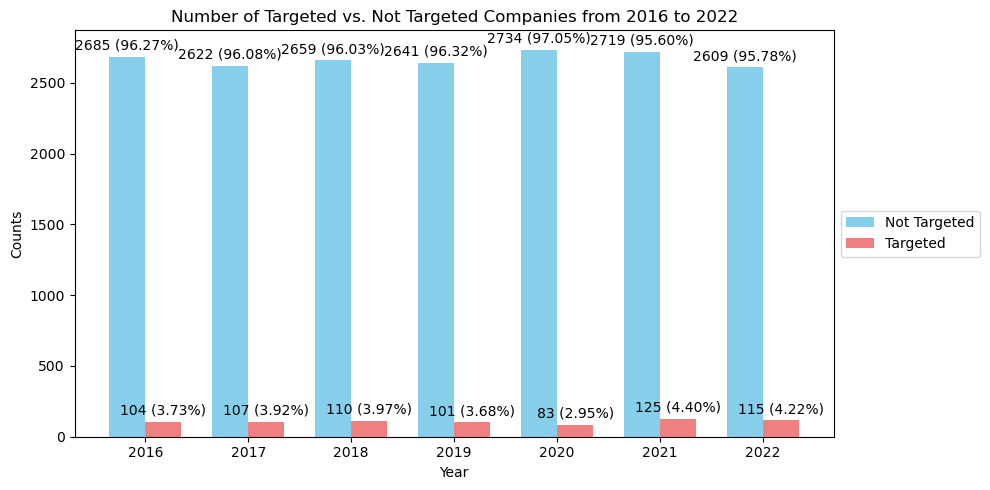

In [27]:
years = list(range(2016, 2023))
targeted_counts = []

# Get counts for each year
for year in years:
    df_year = df[df['year'] == year]
    counts = df_year['targeted'].value_counts()
    targeted_counts.append(counts)

# Convert to DataFrame for easier plotting
df_counts = pd.DataFrame(targeted_counts, index=years).fillna(0)

# Plotting
bar_width = 0.35
index = np.arange(len(years))

fig, ax = plt.subplots(figsize=(10, 5))

bars1 = ax.bar(index, df_counts[0], bar_width, label='Not Targeted', color='skyblue')
bars2 = ax.bar(index + bar_width, df_counts[1], bar_width, label='Targeted', color='lightcoral')

ax.set_xlabel('Year')
ax.set_ylabel('Counts')
ax.set_title('Number of Targeted vs. Not Targeted Companies from 2016 to 2022')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(years)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Annotate bars with count and percentage
def annotate_bars(bars, total_counts):
    for bar in bars:
        height = bar.get_height()
        year = years[int(bar.get_x() + bar_width / 2)]
        percentage = (height / total_counts.loc[year]) * 100
        ax.annotate(f'{height} ({percentage:.2f}%)',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

annotate_bars(bars1, df_counts.sum(axis=1))
annotate_bars(bars2, df_counts.sum(axis=1))

plt.tight_layout()
plt.show()


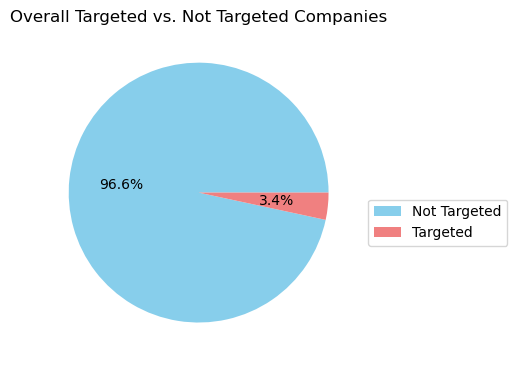

In [28]:
# Assuming 'targeted' is 0 or 1 indicating Not Targeted or Targeted
overall_counts = df['targeted'].value_counts()

# Plotting
fig, ax = plt.subplots(figsize=(5, 5))  # Adjust figure size as needed

# Colors for each section
colors = ['skyblue', 'lightcoral']

# Plot pie chart without labels parameter
ax.pie(overall_counts, colors=colors, autopct='%1.1f%%')

# Add legend outside of the plot
ax.legend(labels=['Not Targeted', 'Targeted'], loc='upper left', bbox_to_anchor=(1, 0.5))

ax.set_title('Overall Targeted vs. Not Targeted Companies')

plt.tight_layout()
plt.show()


## F. Create the a binary column "training_data" 
 - Among the data from 2016 to 2022 (exclude 2023), label 80% as 1 and 20% as 0.

In [29]:
df['training_data'] = np.nan
mask_not_2023 = df['year'] != 2023

num_rows = mask_not_2023.sum()
num_label_1 = int(num_rows * 0.8)

indices_to_label_1 = np.random.choice(df[mask_not_2023].index, size=num_label_1, replace=False)

df.loc[indices_to_label_1, 'training_data'] = 1
df.loc[mask_not_2023 & ~df.index.isin(indices_to_label_1), 'training_data'] = 0

In [30]:
num_rows

19414

In [31]:
num_label_1

15531

## G. Plot counts of missing values for rows & columns

In [32]:
features = ["ceo_is_female","unequal_voting", "ceo_tenure", "board_size", "classified_board_system", "poison_pill", "buyback_yield",
            "dividend_payout_ratio", "cf_to_total_compensation_to_executives", "cf_to_total_compensation_to_board_members",
            "cf_to_capex_industry_peers_percentile", "net_debt_to_ebitda_industry_peers_percentile",
            "current_ratio_industry_peers_percentile", "ebitda_margin_industry_peers_percentile",
            "sales_to_total_assets_industry_peers_percentile", "employee_growth_rate_industry_peers_percentile",
            "fcf_yield_industry_peers_percentile", "sales_growth_rate_industry_peers_percentile",
            "cash_conversion_cycle_industry_peers_percentile", "interest_coverage_ratio_industry_peers_percentile",
            "free_float_percentage", "institution_ownership_percentage", "insider_shares_percentage",
            'rsi_14d', 'rsi_30d', 'volatility_30d', 'volatility_90d', 'volatility_180d', "volume_30d_average_to_outstanding",
            'total_return_5y', 'total_return_4y', 'total_return_3y', 'total_return_2y', 'total_return_1y', 'total_return_6m', 'total_return_3m',
            "roe_industry_peers_percentile", "operating_roic_industry_peers_percentile", "pe_ratio_industry_peers_percentile",
            "eps_industry_peers_percentile", "ev_to_sales_industry_peers_percentile", "tobin_q_ratio_industry_peers_percentile",
            "pb_ratio_industry_peers_percentile", "asset_to_equity_industry_peers_percentile", "ev_ebitda_industry_peers_percentile", "ev_to_asset_industry_peers_percentile"]


df_features_only = df[features]

descriptive_names = ["CEO is female","existence of dual-class voting rights", "CEO's tenure", "board size", "existence of classified board system", "existence of poison pill", "buyback yield",
                     "dividend payout ratio", "free cash flow to total comepensation to executives", "free cash flow to total compensation to board members",
                     "free cash flow to capex", "net debt to EBITDA", "current ratio", "EBITDA margin",
                     "sales to total assets", "employee growth rate", "free cash flow yield", "sales growth rate",
                     "cash conversion cycle", "interest coverage ratio", "free float percentage", "percentage of institutional ownership", "percentage of insider ownership",
                     "14-day RSI", "30-day RSI", "30-day volatility", "90-day volatility", "180-day volatility", "30-day average trading volume to outstanding shares",
                     "5-year total return", "4-year total return", "3-year total return", "2-year total return", "1-year total return", "6-month total return", "3-month total return",
                     "return on equity(ROE)", "return on invested capital(ROIC)", "price-earnings ratio(PER)", "earnings per share(EPS)", "enterprise value to sales", "Tobin's Q ratio",
                     "price-to-book ratio (PBR)", "assets to equity", "EV/EBITDA", "enterprise value to asset"]

# Mapping old feature names to new names
feature_name_mapping = dict(zip(features, descriptive_names))

df_features_only.columns = [feature_name_mapping[feature] for feature in df_features_only.columns]


In [33]:
len(descriptive_names)

46

In [34]:
# Rename columns for clarity
missing_data = {}

# Calculate missing values for the entire dataframe
missing_data['total_count'] = df_features_only.isnull().sum()
missing_data['total_pct'] = df_features_only.isnull().mean() * 100

# Create the desired dataframe
df_missing = pd.DataFrame(missing_data)

df_missing_sorted = df_missing.sort_values(by='total_pct', ascending=False)


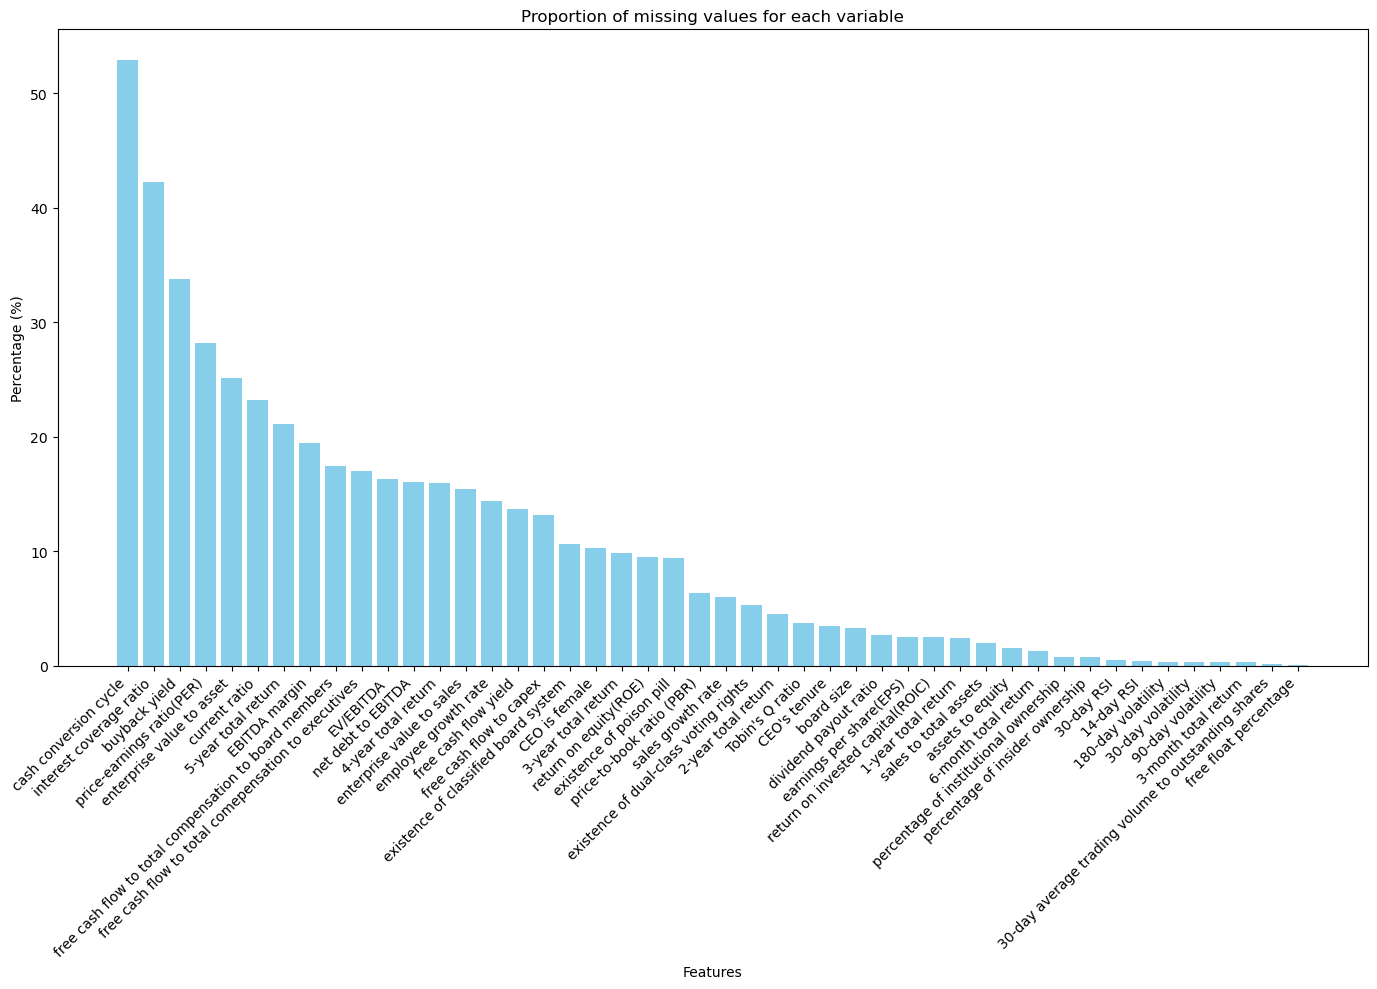

In [35]:
# Plotting
plt.figure(figsize=(14, 10))
bars = plt.bar(df_missing_sorted.index, df_missing_sorted['total_pct'], color='skyblue')
plt.ylabel('Percentage (%)')
plt.xlabel('Features')
plt.title('Proportion of missing values for each variable')
plt.xticks(rotation=45, ha='right')  # Rotate labels to avoid overlap
plt.tight_layout()

/var/folders/kw/6hnl881s2p9701b42gpjt_pr0000gn/T/ipykernel_20401/2581623628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features_only['missing_count'] = df_features_only.isnull().sum(axis=1)


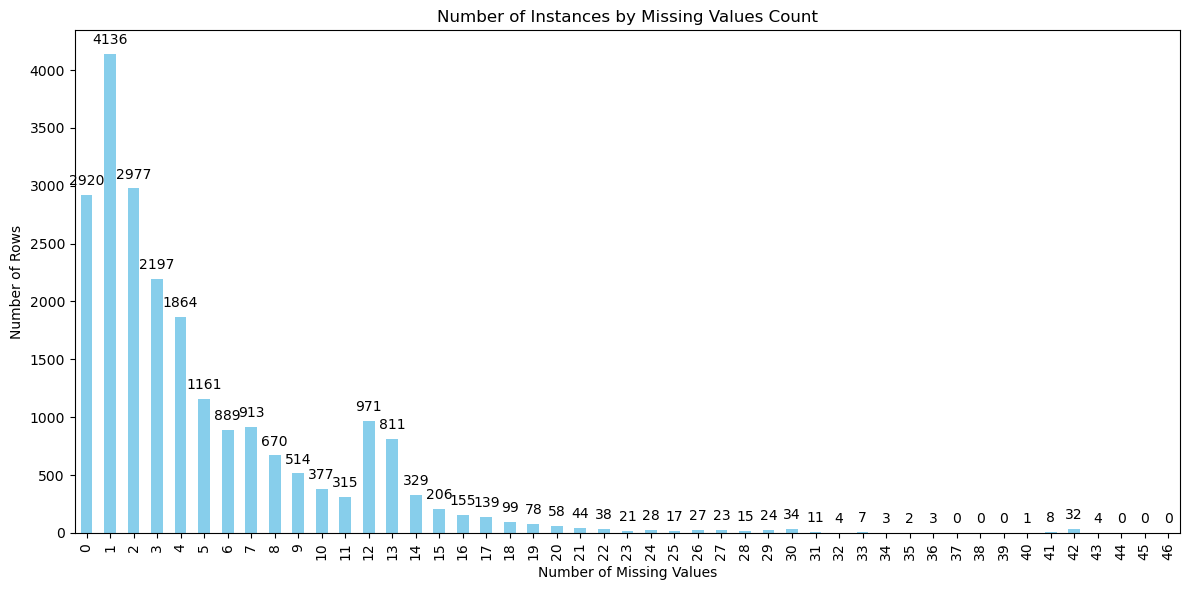

In [36]:
# Calculate missing_count for each row
df_features_only['missing_count'] = df_features_only.isnull().sum(axis=1)
grouped = df_features_only['missing_count'].value_counts()

# Ensure all possible values are in the index
for i in range(df_features_only.shape[1]):  # Exclude the 'missing_count' column
    if i not in grouped:
        grouped[i] = 0

grouped = grouped.sort_index()

# Plot the bar chart
ax = grouped.plot(kind='bar', figsize=(12, 6),color='skyblue')
plt.xlabel('Number of Missing Values')
plt.ylabel('Number of Rows')
plt.title('Number of Instances by Missing Values Count')

# Annotate the bars with the count values
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

## H. Plot Covariance matrix

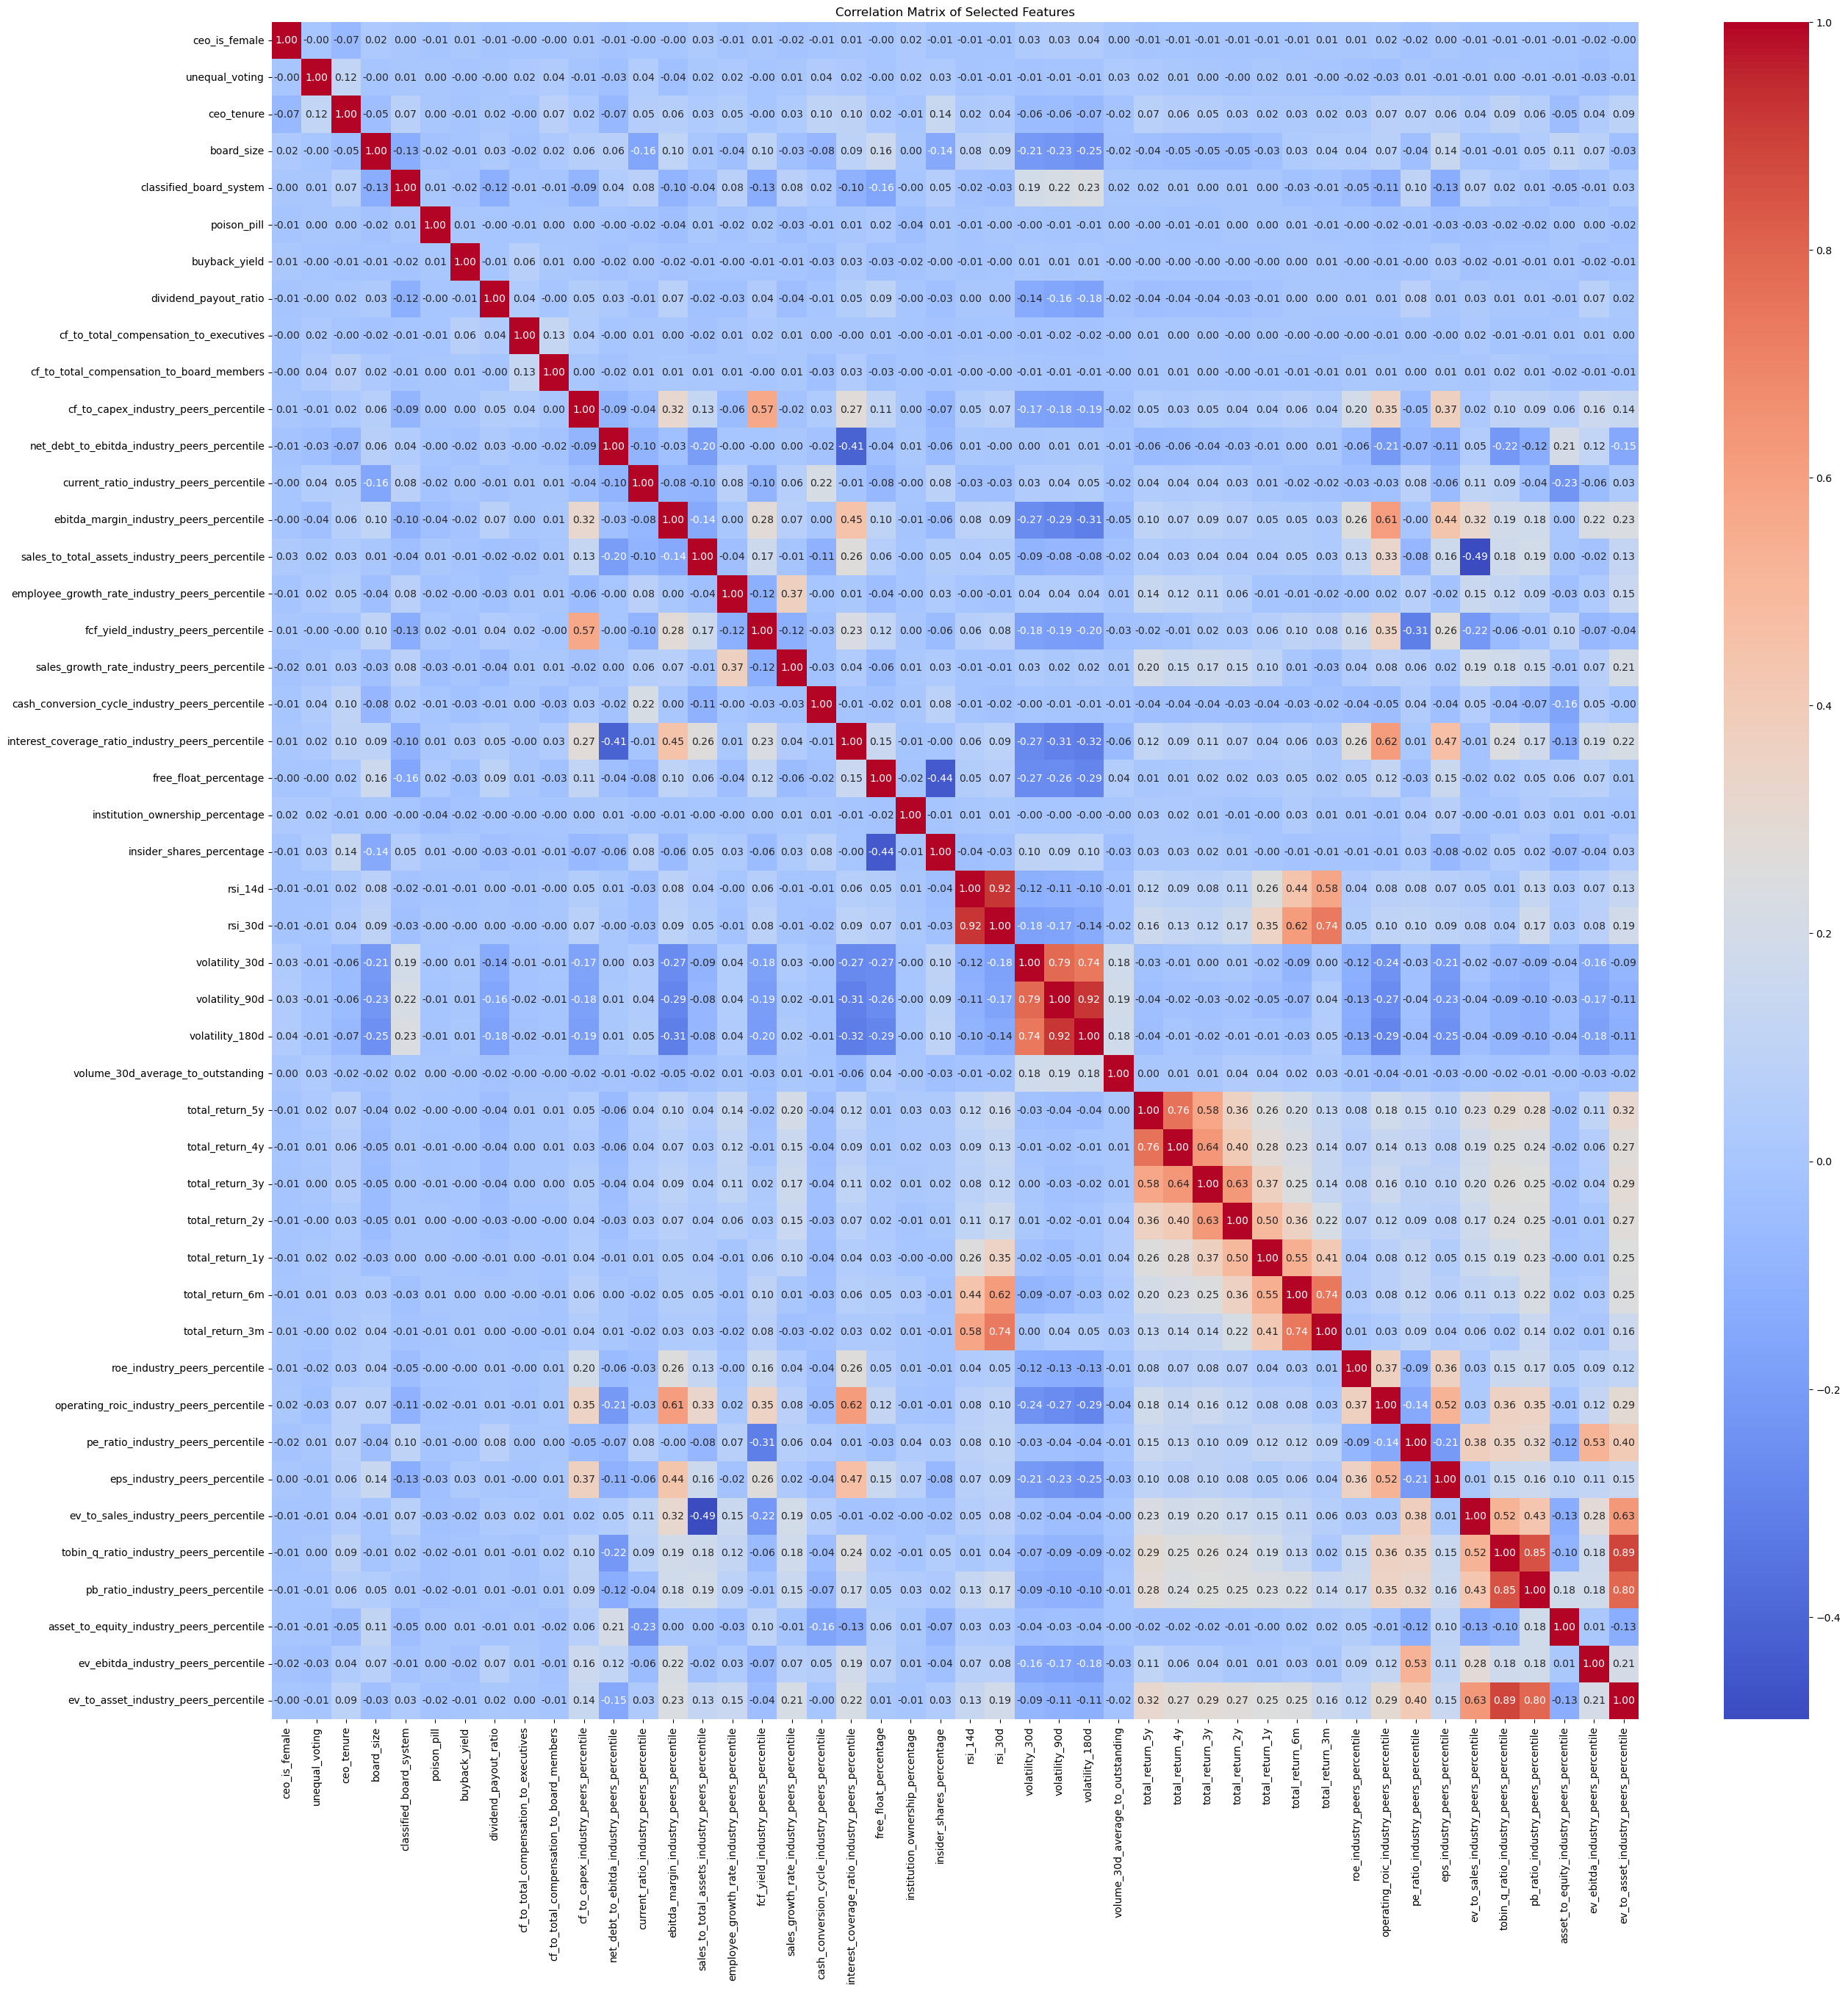

In [37]:
# Calculate the correlation matrix for the features of interest
corr_matrix = df[features].corr()

# Plotting the correlation matrix using seaborn's heatmap function
plt.figure(figsize=(30, 30))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)

plt.title('Correlation Matrix of Selected Features')
plt.show()

## Export the dataframe

In [38]:
df.to_csv('../database/companies/original/2016-2023.csv')